In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [32]:
img = cv2.resize(cv2.imread('Y7.jpg', 0), (225,225))

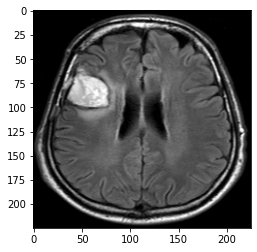

In [33]:
plt.imshow(img, cmap='gray')

In [34]:
img.shape

(225, 225)

In [35]:
filter = np.array([[-0.20969854,  0.15489163, -0.17589137],
       [-0.41128138,  0.2219697 ,  0.47233412],
       [-0.17181034,  0.04917061, -0.2389242 ]])

In [36]:
filter

array([[-0.20969854,  0.15489163, -0.17589137],
       [-0.41128138,  0.2219697 ,  0.47233412],
       [-0.17181034,  0.04917061, -0.2389242 ]])

In [37]:
def convolution(img_slice, kernel):
    conv_img = 0
    conv_img = np.multiply(img_slice, kernel)
    conv_img = np.sum(conv_img)
    return conv_img

In [38]:
convoled_img = np.zeros(shape = (223, 223))
for i in range(img.shape[0]-2):
    for j in range(img.shape[1]-2):
        img_slice = img[i:i+3,j:j+3]
        convoled_img[i,j] = convolution(img_slice, filter)

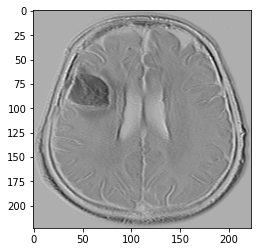

In [39]:
img_slice = img[i:i+3,j:j+3]
plt.imshow(convoled_img, cmap = 'gray')

In [40]:
f = np.fft.fftn(img)
f2 = np.pad(filter,(111,111))
f21 = np.fft.fftn(f2)
aaa = f * f21
fft = np.fft.ifftn(aaa)

In [41]:
zeros = np.zeros((225,225))
zeros[1:113,1:113] = fft.real[113:,113:]
zeros[1:113,113:] = fft.real[113:,1:113]
zeros[113:,1:113] = fft.real[1:113,113:]
zeros[113:,113:] = fft.real[1:113,1:113]

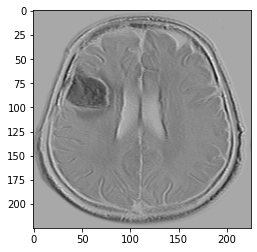

In [42]:
plt.imshow(zeros, cmap='gray')

In [43]:
fft.shape

(225, 225)

In [44]:
convoled_img.shape

(223, 223)